# 선형회귀

In [2]:
import pandas as pd
import numpy as np

In [3]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [4]:
from sklearn.neighbors import KNeighborsRegressor

In [5]:
# 1 머신러닝 모델 선택
kn = KNeighborsRegressor(n_neighbors=3)

In [12]:
train_data = perch_length.reshape(-1, 1)
train_data.shape, perch_weight.shape

((56, 1), (56,))

In [13]:
kn.fit(train_data,perch_weight)
# Expected 2D array, got 1D array instead:
# 

KNeighborsRegressor(n_neighbors=3)

In [23]:
sample_data = np.array([50])
sample_data = sample_data.reshape(-1,1)
sample_data
kn.predict(sample_data)

array([[50]])

In [24]:
kn.predict([[50]])

array([1000.])

In [26]:
distance, indexs = kn.kneighbors(sample_data)

In [27]:
perch_weight[indexs]

array([[1000., 1000., 1000.]])

### 시각화를 통해 학습한 데이터와 실제 데이터

In [29]:
import matplotlib.pyplot as plt

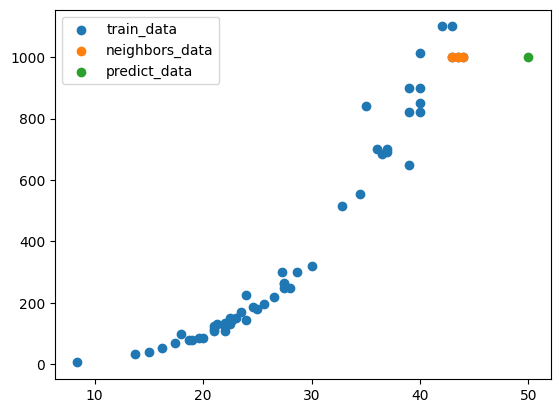

In [30]:
plt.scatter(perch_length,perch_weight,label = 'train_data')
plt.scatter(perch_length[indexs],perch_weight[indexs], label='neighbors_data')
plt.scatter(50,1000,label="predict_data")
plt.legend()
plt.show()

### 길이가 100일때 무게는 얼마일까? 그리고 왜 그럴까?

In [34]:
kn.predict([[100]])
_, indexs = kn.kneighbors([[100]])

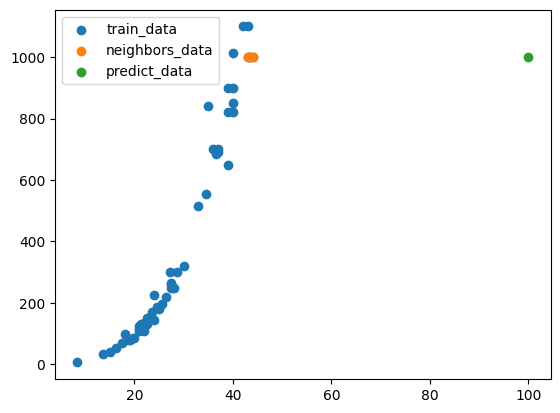

In [35]:
plt.scatter(perch_length,perch_weight,label = 'train_data')
plt.scatter(perch_length[indexs],perch_weight[indexs], label='neighbors_data')
plt.scatter(100,1000,label="predict_data")
plt.legend()
plt.show()

# LinearRegression
    선형의 방적식을 구하는 알고리즘.. (근사치) 실제값과 구한 직선의 방정식들의 오차가 최소가 되는 식을 구함
    y = ax + b

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
# 모델객체 생성
lr = LinearRegression()

In [39]:
# 학습
lr.fit(train_data, perch_weight)

LinearRegression()

In [46]:
# 예측
lr.predict([[5]]), lr.predict([[50]])

(array([-463.38567841]), array([1198.84124015]))

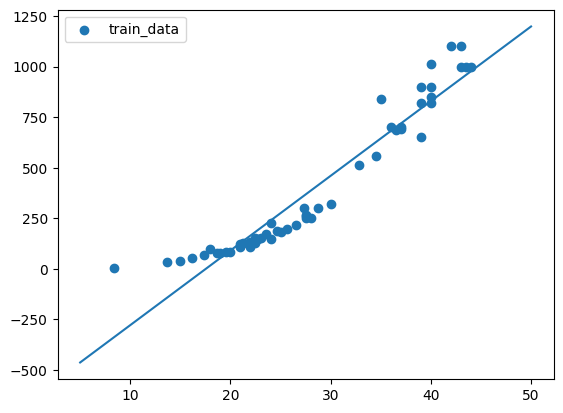

In [54]:
# 선형회귀의  시각화
plt.scatter(perch_length,perch_weight,label = 'train_data')
# x :  10 부터 50까지 직선을 그린다.
plt.plot([5,50],[-463.38567841,1198.84124015])
plt.legend()
plt.show()

# 단항식 - > 다항식
    y = ax2+ bx + c
    패턴이나 기타 다른 수학적 또는 알고리즘의 변경없이 다항식으로 변환